## Web Scraping Project

### เขียนบทนำเกี่ยวกับโปรเจ็กต์ อธิบายวัตถุประสงค์และความสำคัญของการวิเคราะห์ข้อมูลจากเว็บ

ขั้นตอนที่ 1 การดึงข้อมูลจากเว็บ (Web Scraping) 

In [4]:
# import web grabbing client and
# HTML parser
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
 
# variable to store website link as string
myurl = 'http://books.toscrape.com/index.html'
 
# grab website and store in variable uclient
uClient = uReq(myurl)
 
# read and close HTML
page_html = uClient.read()
uClient.close()
 
# call BeautifulSoup for parsing
page_soup = soup(page_html, "html.parser")
 
# grabs all the products under list tag
bookshelf = page_soup.findAll(
    "li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})
 
# create csv file of all products
filename = ("Books1.csv")
f = open(filename, "w")
 
headers = "Book title, Price\n"
f.write(headers)
 
for books in bookshelf:
 
    # collect title of all books
    book_title = books.h3.a["title"]
 
    # collect book price of all books
    book_price = books.findAll("p", {"class": "price_color"})
    price = book_price[0].text.strip()

            
    # If book_title or book_price contains a comma, enclose in quotes
    if "," in book_title:
        book_title = f'"{book_title}"'
    if "," in book_price:
        book_price = f'"{book_price}"'
 
    print("Title of the book :" + book_title)
    print("Price of the book :" + price)
 
    f.write(book_title + "," + price+"\n")
 
f.close()

Title of the book :A Light in the Attic
Price of the book :£51.77


UnicodeEncodeError: 'charmap' codec can't encode character '\xa3' in position 21: character maps to <undefined>

In [5]:
# import web grabbing client and
# HTML parser
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import csv
 
# variable to store website link as string
myurl = 'http://books.toscrape.com/index.html'
 
# grab website and store in variable uclient
uClient = uReq(myurl)
 
# read and close HTML
page_html = uClient.read()
uClient.close()

# call BeautifulSoup for parsing
page_soup = soup(page_html, "html.parser")
 
# grabs all the products under list tag
bookshelf = page_soup.findAll( "li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})
 
# create csv file of all products
filename = ("Books2.csv")
f = open(filename, mode="w", newline="", encoding="utf-8")
writer = csv.writer(f)
 
writer.writerow(["Book Title", "Price"])
 
for books in bookshelf:
 
    # collect title of all books
    book_title = books.h3.a["title"]
 
    # collect book price of all books
    book_price = books.findAll("p", {"class": "price_color"})
    price = book_price[0].text.strip()
 
    print("Title of the book :" + book_title)
    print("Price of the book :" + price)
 
    writer.writerow([book_title, price])
 
f.close()

Title of the book :A Light in the Attic
Price of the book :£51.77
Title of the book :Tipping the Velvet
Price of the book :£53.74
Title of the book :Soumission
Price of the book :£50.10
Title of the book :Sharp Objects
Price of the book :£47.82
Title of the book :Sapiens: A Brief History of Humankind
Price of the book :£54.23
Title of the book :The Requiem Red
Price of the book :£22.65
Title of the book :The Dirty Little Secrets of Getting Your Dream Job
Price of the book :£33.34
Title of the book :The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price of the book :£17.93
Title of the book :The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price of the book :£22.60
Title of the book :The Black Maria
Price of the book :£52.15
Title of the book :Starving Hearts (Triangular Trade Trilogy, #1)
Price of the book :£13.99
Title of the book :Shakespeare's Sonnets
Price of the book :£20.66
Title of the book :Set

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://books.toscrape.com/'
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

# Assuming categories are listed in a sidebar or specific section
category_container = soup.find('div', {'class': 'side_categories'})
categories = category_container.find_all('a')

Categories = []

for category in categories:
    category_name = category.get_text().strip()
    category_link = url + category['href']
    # print(category_name, category_link)
    Categories.append({"Category":category_name,"Link":category_link})

for c in Categories:
    print(c['Category'],c["Link"])

In [ ]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from urllib.parse import urljoin  # Import the urljoin function

Extracted_links = []

for i in range(49):
    # Correct the base URL to the root of the book listings
    base_url = f'https://books.toscrape.com/catalogue/category/books_1/page-{i + 1}.html'

    # Open connection and grab the main page
    uClient = uReq(base_url)
    page_html = uClient.read()
    uClient.close()

    # HTML parsing
    page_soup = soup(page_html, "html.parser")

    # Find the correct link by inspecting where the relative links start
    for bookLink in page_soup.findAll("h3"):
       Extracted_links.append(urljoin(base_url, bookLink.find('a')['href']))

# Print the correctly formed URLs
for link in Extracted_links:
    print(link)


In [6]:
print(Extracted_links)

NameError: name 'Extracted_links' is not defined

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup as soup

number_mapping = {
"One": 1,
"Two": 2,
"Three": 3,
"Four": 4,
"Five": 5
}   

# Test_links = ["https://books.toscrape.com/catalogue/hawkeye-vol-1-my-life-as-a-weapon-hawkeye-1_24/index.html","https://books.toscrape.com/catalogue/having-the-barbarians-baby-ice-planet-barbarians-75_23/index.html"]

# Create CSV file of all products
filename = "Books_data.csv"
with open(filename, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    
    # Write header row
    writer.writerow(["Genre", "Book Title", "Price", "Rating", "Stock Status", "Number of Reviews"])

    # Loop through each collected book link to access detail pages
    for link in Extracted_links:
        # Fetch the detail page
        response = requests.get(link)
        detail_html = response.text
        
        # HTML parsing for detail page
        detail_soup = soup(detail_html, "html.parser")

        # Extracting detailed product information
        product_info = {row.th.text: row.td.text for row in detail_soup.findAll("tr")}
        category = detail_soup.find('ul', class_="breadcrumb").find_all('a')[2].text.strip()
        title = detail_soup.find('h1').text
        price = product_info.get("Price (incl. tax)")
        rating = number_mapping.get(detail_soup.find('p', class_="star-rating")['class'][1], "Invalid input")
        stock_status = product_info.get("Availability")
        number_of_reviews = product_info.get("Number of reviews")

        # Write the product details to the CSV
        writer.writerow([category, title, price, rating, stock_status, number_of_reviews])

        print(title, "finished")

ขั้นตอนที่ 2 การทำความสะอาดและเตรียมข้อมูล (Data Cleaning and Preparation)

In [5]:
import pandas as pd

df = pd.read_csv('Books_data.csv')

print(df.info())   # ตรวจสอบชนิดของข้อมูลในแต่ละคอลัมน์และจำนวนข้อมูลที่ไม่เป็น null
print(df.duplicated().sum())    # ตรวจสอบข้อมูลที่ซ้ำกัน
df['Price'] = df['Price'].str.replace('[Ã‚Â£]', '', regex=True) #ลบสกุลเงินออก
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]  # ตรวจสอบค่า Rating ที่ไม่อยู่ในช่วงที่เหมาะสม (1-5)
df = df[df['Price'] > 0]    # ตรวจสอบราคาหนังสือที่อาจไม่สมเหตุสมผล

duplicate_count = df.duplicated(subset=['Book Title']).sum()
print(duplicate_count)

# ตรวจสอบแถวที่มีชื่อซ้ำ
duplicates = df[df.duplicated(subset=['Book Title'], keep=False)]
# หาและนับชื่อที่ซ้ำ
duplicate_titles = duplicates['Book Title'].value_counts()

print(duplicate_titles)

df = df.drop(columns = "Number of Reviews")

df.to_csv('cleaned_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Genre              980 non-null    object
 1   Book Title         980 non-null    object
 2   Price              980 non-null    object
 3   Rating             980 non-null    int64 
 4   Stock Status       980 non-null    object
 5   Number of Reviews  980 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 46.1+ KB
None
0
1
Book Title
The Star-Touched Queen    2
Name: count, dtype: int64


ขั้นตอนที่ 3 การวิเคราะห์ข้อมูล (Data Analysis)

In [7]:
import pandas as pd
import scipy.stats as stats
# โหลดข้อมูลที่ cleanแล้ว
df = pd.read_csv('cleaned_data.csv')

In [8]:
#จัดอันดับความนิยมของหนังสือแต่ล่ะประเภทและ หาค่าเฉลี่ยของ price ตามประเภท
genre_mean_price_rating = df.groupby('Genre')[['Rating','Price']].mean()
ranking_genre_byRating = genre_mean_price_rating.sort_values(by='Rating', ascending=False)
ranking_genre_byRating

,Rating,Price
Genre,,
Erotica,5.000000,19.190000
Adult Fiction,5.000000,15.360000
Novels,5.000000,54.810000
Christian Fiction,4.166667,34.385000
Health,3.750000,51.452500
Art,3.625000,38.520000
Poetry,3.526316,35.974211
Humor,3.400000,33.501000
Spirituality,3.333333,35.098333


In [9]:
#การทดสอบ ANOVA สำหรับความแตกต่างของราคาตาม Genre
f_val, p_val = stats.f_oneway(*(df[df['Genre'] == genre]['Price'] for genre in df['Genre'].unique()))
print("F-Value of genre:", f_val)
print("P-Value of genre:", p_val)

#------------------------------------------------------------------------------------------------------

#การทดสอบ ANOVA สำหรับความแตกต่างของราคาตาม rating
df['Rating_Category'] = pd.cut(df['Rating'],
                               bins=[0, 2, 4, 5],  # กำหนดช่วงคะแนน
                               labels=['Low', 'Medium', 'High'])  # ตั้งชื่อกลุ่ม
# สร้างลิสต์ของข้อมูลราคาในแต่ละกลุ่มของ Rating
price_by_rating = [df[df['Rating_Category'] == category]['Price'] for category in df['Rating_Category'].unique()]

# ทำการทดสอบ ANOVA
f_val, p_val = stats.f_oneway(*price_by_rating)

print("F-Value of rating:", f_val)
print("P-Value of rating:", p_val)


F-Value of genre: 0.9946210445528134
P-Value of genre: 0.4855264643252697
F-Value of rating: 0.3894629574907809
P-Value of rating: 0.67752570379754


ขั้นตอนที่ 4 การสร้างภาพแสดงข้อมูล (Visualization)

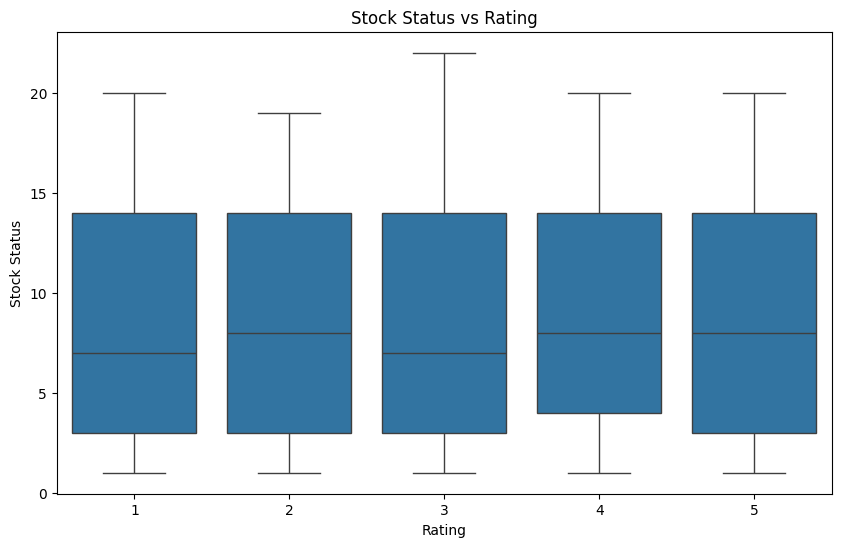

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# แสดงการกระจายของ Stock Status ตาม Rating
plt.figure(figsize=(10, 6))
sns.boxplot(y='Stock Status', x='Rating', data=df)
plt.title('Stock Status vs Rating')
plt.show()

# การวิเคราะห์ความสัมพันธ์ของ Stock Status กับ Genre
stock_status_genre = df.groupby('Genre')['Stock Status'].mean()

# print("Average Stock Status by Genre:")
# print(stock_status_genre)

Text(0.5, 1.0, 'Visualization')

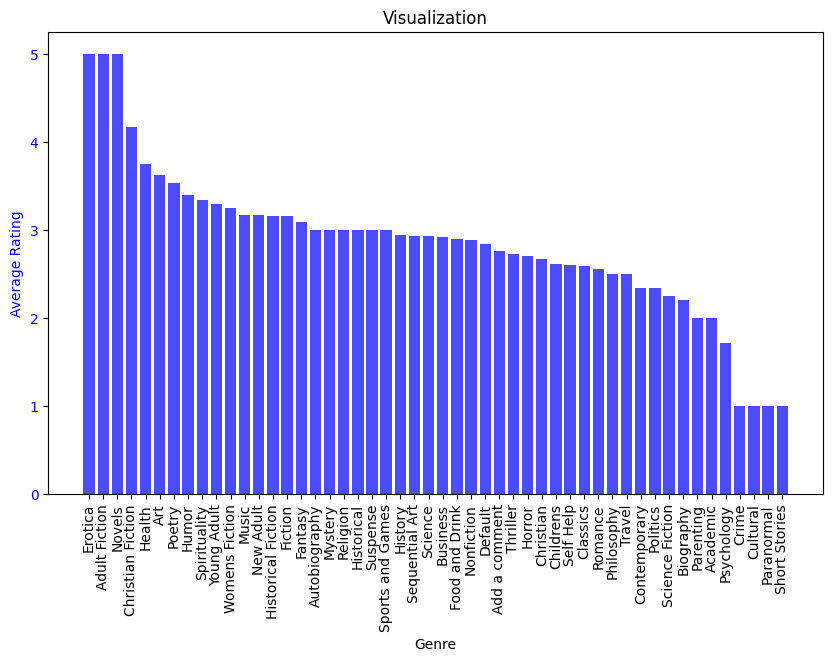

In [21]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(ranking_genre_byRating.index, ranking_genre_byRating['Rating'], color='b', alpha=0.7, label='Rating')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Rating', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=90)
plt.title('Visualization')

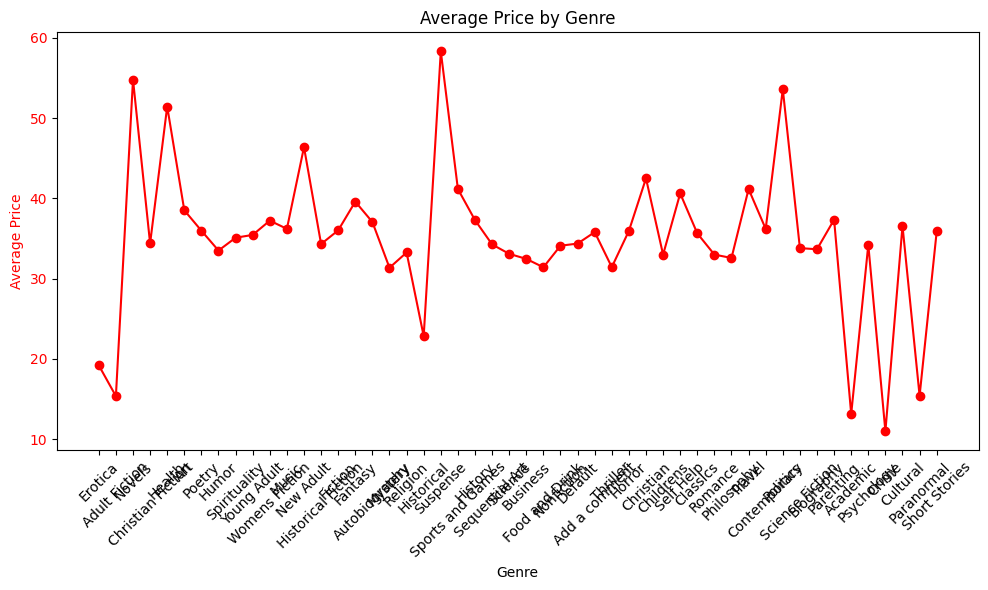

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(ranking_genre_byRating.index, ranking_genre_byRating['Price'], color='r', marker='o', label='Price')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Price', color='r')
ax1.tick_params(axis='y', labelcolor='r')

plt.title('Average Price by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


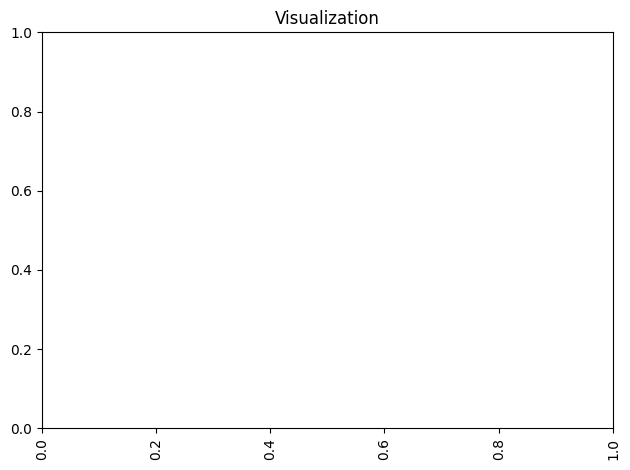

In [15]:
ax1.bar(ranking_genre_byRating.index, ranking_genre_byRating['Rating'], color='b', alpha=0.7, label='Rating')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Rating', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=90)
plt.title('Visualization')

ax1.bar(ranking_genre_byRating.index, ranking_genre_byRating['Rating'], color='b', alpha=0.7, label='Rating')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Rating', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=90)
plt.title('Visualization')

ax2 = ax1.twinx()
ax2.plot(ranking_genre_byRating.index, ranking_genre_byRating['Price'], color='r', marker='o', label='Price')
ax2.set_ylabel('Average Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.tight_layout()
plt.show()